In [1]:
import pandas as pd
import math
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 100)
from os.path import exists
from stockfish import Stockfish
import chess
import chess.engine
import chess.pgn
import random
import time
from joblib import Parallel, delayed
import multiprocessing
import pickle
import os
import logging
import func_timeout
stockfishpath=r"C:\Program Files\stockfish_15_win_x64_avx2\stockfish_15_x64_avx2.exe"

import libreria_analisi
import lib_crea_random_pos
from  lib_load_fen_data import load_m8_list, parse_png
from libreria_individua_problemi import elaborate_evaluation_for_mate, elaborate_evaluation_for_problem, analyze_problem, select_puzzle

In [2]:
m8n2_fen = load_m8_list(r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\puzzles\m8n2.txt',6)
m8n3_fen = load_m8_list(r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\puzzles\m8n3.txt',6)
m8n4_fen = load_m8_list(r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\puzzles\m8n4.txt',6)

In [2]:
#file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_random_pos_5-6_man.pkl'
#file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_random_pos_7-8_man.pkl'
#file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_random_pos_9-10_man.pkl'
#file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_random_pos_11-12_man.pkl'
#file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_random_pos_13-14_man.pkl'
#file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_random_pos_15-16_man.pkl'
#file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_random_pos_17-18_man.pkl'
file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_random_pos_5-10_man-150x.pkl'
#file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_m8n4.pkl'
#file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_m8n3.pkl'
#file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_m8n2.pkl'
#file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_pgn_compositions.pkl'
#file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_sei_problemi.pkl'
file_path = r'C:\Users\Giorgio\Documents\Python Scripts\Scacchi puzzle\chess_puzzles\all_evaluation_random_pos_12072022.pkl'

with open(file_path, 'rb') as pickle_file:
    all_evaluation=pickle.load(pickle_file)

#mate
solution_map, acceptable_solution, regret_solution = elaborate_evaluation_for_mate(all_evaluation)
problem_level = analyze_problem(acceptable_solution)
puzzle = select_puzzle(problem_level, all_evaluation, not_start_check=False)
puzzle[puzzle.difficult>10]

,fen,move,difficult,n_move
27,4Q2Q/2K5/8/8/4r3/4k1N1/8/8 w - - 0 1\n,Qxe4+,15,3
52,8/8/q7/4nk2/5P2/2K5/8/5b2 w - - 0 1\n,fxe5,15,-5
64,k7/1p6/8/6P1/3KR3/3P4/8/8 w - - 0 1\n,Kc5,25,5
75,8/1P6/6BK/2q3R1/3P4/8/8/7k w - - 0 1\n,dxc5,15,3
113,2Q5/4K2k/5R2/7r/8/8/2N5/3N4 w - - 0 1\n,Kf7,25,3
115,8/8/8/2K5/2B2k2/4R3/8/bQ3q2 w - - 0 1\n,Qe4+,15,3
131,N2n4/8/8/8/KB6/4Q3/4n3/1k6 w - - 0 1\n,Ba3,25,3
189,3k4/8/2Q5/5Rp1/n7/5p1K/1P6/8 w - - 0 1\n,Rd5+,15,3
204,5q2/1p2kb2/5R2/r7/4K3/8/2B5/8 w - - 0 1\n,Rf5,15,-10
217,7k/4b3/8/nn6/p7/1B6/8/3b3K w - - 0 1\n,Bxd1,25,-13


In [4]:
#problem
solution_map, acceptable_solution, regret_solution = elaborate_evaluation_for_problem(all_evaluation)
problem_level = analyze_problem(acceptable_solution)
puzzle = select_puzzle(problem_level, all_evaluation, not_start_check=False)
puzzle

,fen,move,difficult,n_move
33,8/3n4/8/1q3k2/8/2p4K/8/Q7 w - - 0 1\n,Qxc3,10,None
133,8/2q2k2/3R4/3Pp3/8/8/8/B3K3 w - - 0 1\n,Bxe5,10,None
224,1k3K2/8/4NP2/3P4/8/8/2p4p/2N5 w - - 0 1\n,d6,5,None
237,2n3K1/1p6/P7/2p5/1r6/4n3/1Q6/7k w - - 0 1\n,Qc1+,5,None
351,8/2n4p/6BK/8/5pqQ/4p3/kr6/8 w - - 0 1\n,Qxg4,10,None


In [5]:
problem_level.loc[[458]]

depth_level          depth_5                            depth_10                            depth_15                            depth_20                            depth_25                    is_a_problem is_trivial_problem minimun_depth_solver
method      different_levels       n_best       different_levels       n_best       different_levels       n_best       different_levels       n_best       different_levels       n_best                                                           
grade                     10 15 20      3  2  1               10 15 20      3  2  1               10 15 20      3  2  1               10 15 20      3  2  1               10 15 20      3  2  1                                                     
458                        1  1  0      0  0  1                1  1  1      0  0  1                1  1  1      0  0  1                1  1  1      0  0  1                1  1  1      0  0  1         True              False                   10

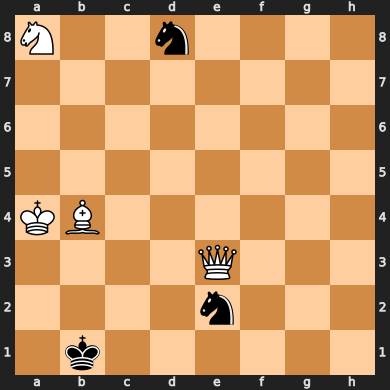

In [8]:
engine = chess.engine.SimpleEngine.popen_uci(stockfishpath)
chess.Board('N2n4/8/8/8/KB6/4Q3/4n3/1k6 w - - 0 1\n')

In [7]:
all_evaluation.loc[[458]]

depth_level          depth_5                                                                                                                                                      depth_10                                                                                                                                                       depth_15                                                                                                                                                       depth_20                                                                                                                                                       depth_25                                                                                                                                                                                        fen total_time problem_type
method      different_levels                                                                      n_best                                                                  different_levels                                                                      n_best                                                                   different_levels                                                                      n_best                                                                   different_levels                                                                      n_best                                                                   different_levels                                                                       n_best                                                                                                                                      
grade                     10        15        20    10    15    20    10    15    20                   3         2         1     3     2     1    3     2     1                         10        15        20    10    15    20    10    15    20                   3         2         1     3     2     1     3     2     1                         10        15        20    10    15    20    10    15    20                   3         2         1     3     2     1     3     2     1                         10        15        20    10    15    20    10    15    20                   3         2         1     3     2     1     3     2     1                         10        15        20    10    15    20    10    15    20                    3         2         1     3     2     1     3     2     1                                                                              
score_move         centipawn centipawn centipawn  mate  mate  mate  move  move  move      time centipawn centipawn centipawn  mate  mate  mate move  move  move      time        centipawn centipawn centipawn  mate  mate  mate  move  move  move      time centipawn centipawn centipawn  mate  mate  mate  move  move  move      time        centipawn centipawn centipawn  mate  mate  mate  move  move  move      time centipawn centipawn centipawn  mate  mate  mate  move  move  move      time        centipawn centipawn centipawn  mate  mate  mate  move  move  move      time centipawn centipawn centipawn  mate  mate  mate  move  move  move      time        centipawn centipawn centipawn  mate  mate  mate  move  move  move       time centipawn centipawn centipawn  mate  mate  mate  move  move  move      time                                                                    
458                       35        35        47  None  None  None  Rxg6  Rxg6  Nxg6  0.516096       -52        44       467  None  None  None  Rc5  Nxg6  Rxg6  0.078132              459       459       467  None  None  None  Rxg6  Rxg6  Rxg6  0.627815         0         0       537  None  None  None  Qb5+  Nxg6  Rxg6  0.107213              514       514       524  None  None  None  Rxg6  Rxg6  Rxg6  2.328565         0         5       550  None  None  None  Qb5+  Nxg6  Rxg6  0.390618             

In [8]:
#devo filtrare e salvare due casistiche sull'n_best moves:
#1) il matto è minore di 5 mosse e tutti gli altri sono matti maggiori
#2) il matto è maggiore di 4 mosse e l'evaluation è patta o persa